In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [22]:
data = pd.read_csv('tips.csv')

In [23]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


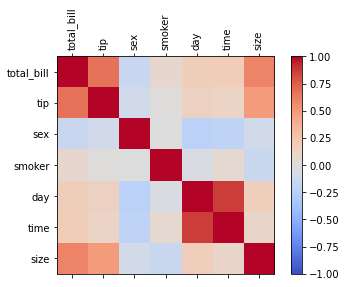

In [16]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [11]:
data.sex = data.sex.replace('Male','0')
data.sex = data.sex.replace('Female','1')

In [12]:
data.smoker = data.smoker.replace('No','0')
data.smoker = data.smoker.replace('Yes','1')

In [13]:
data.time = data.time.replace('Dinner','1')
data.time = data.time.replace('Lunch','0')

In [14]:
data.day = data.day.replace('Thur','0')
data.day = data.day.replace('Fri','1')
data.day = data.day.replace('Sat','2')
data.day = data.day.replace('Sun','3')

In [15]:
data.sex = data.sex.astype('int')
data.smoker=data.smoker.astype('int')
data.day=data.day.astype('int')
data.time=data.time.astype('int')

In [20]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4


In [25]:
data_B = data.copy()

In [26]:
X = data_B.drop('tip',axis=1)
y = data_B['tip']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [33]:
models = {'ridge':Ridge(alpha=0.1),'lasso':Lasso(),'tree':DecisionTreeRegressor(),'linear':LinearRegression()}
for x in models:
    models[x].fit(X_train,y_train)
    figures = models[x].predict(X_test)
    print(mean_squared_error(y_test,figures))

1.150495358922154
1.447259185015229
1.317110204081633
1.1508502132427416


In [34]:
model = DecisionTreeRegressor()

In [35]:
model.fit(X_train,y_train)
ypred = model.predict(X_test)

In [36]:
y_test[:15]

200    4.00
112    4.00
128    2.00
179    3.55
49     3.00
15     3.92
184    3.00
213    2.50
32     3.00
55     3.51
36     2.00
174    4.00
171    3.16
207    3.00
28     4.30
Name: tip, dtype: float64

In [37]:
ypred[:15]

array([3.08, 5.  , 3.39, 3.11, 3.76, 3.31, 3.11, 4.  , 1.96, 3.18, 3.71,
       2.  , 2.23, 2.5 , 4.08])

In [61]:
xg = XGBRegressor(learning_rate=0.1)

In [62]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred = xg.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.9486540442553926


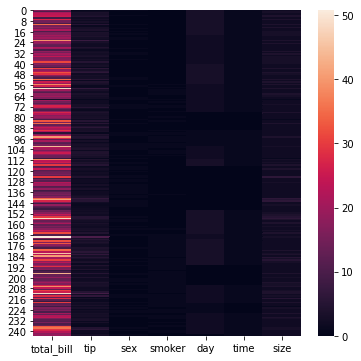

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(data = data)
plt.show()